In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Zoo.csv to Zoo (3).csv


In [3]:
zoo= pd.read_csv("Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [7]:
zoo[zoo['animal name']=='frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [8]:
######## as both frogs are different
zoo['animal name'][(zoo['venomous']==1) & (zoo['animal name']=='frog')]='frog2'

In [9]:
zoo.head(27)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [10]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


[]

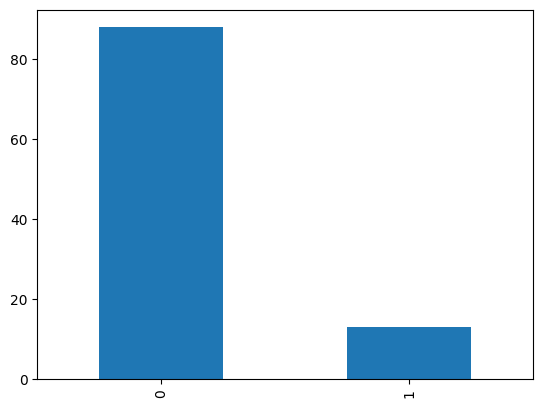

In [11]:
zoo['domestic'].value_counts().plot(kind='bar');
plt.xlabel= 'Domestic'
plt.ylabel= 'Count'
plt.plot()

[]

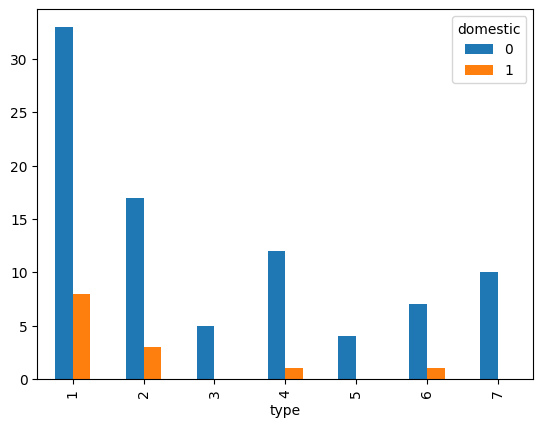

In [12]:
pd.crosstab(zoo['type'],zoo['domestic']).plot(kind='bar');
plt.plot()

In [13]:
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3, random_state=42)

In [39]:
final_model= KNeighborsClassifier(n_neighbors=5)
final_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [17]:
pred= final_model.predict(X_test)

In [18]:
final_acc= np.mean(pred==Y_test)
final_acc

0.8387096774193549

In [19]:
result= cross_val_score(final_model,X,Y,cv=10)
result.mean()

0.7236363636363635

# **Grid Search for Algorithm Tuning**

In [20]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [21]:
grid_model = KNeighborsClassifier()
grid = GridSearchCV(estimator=grid_model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [22]:
print(grid.best_score_)
print(grid.best_params_)

0.800952380952381
{'n_neighbors': 7}


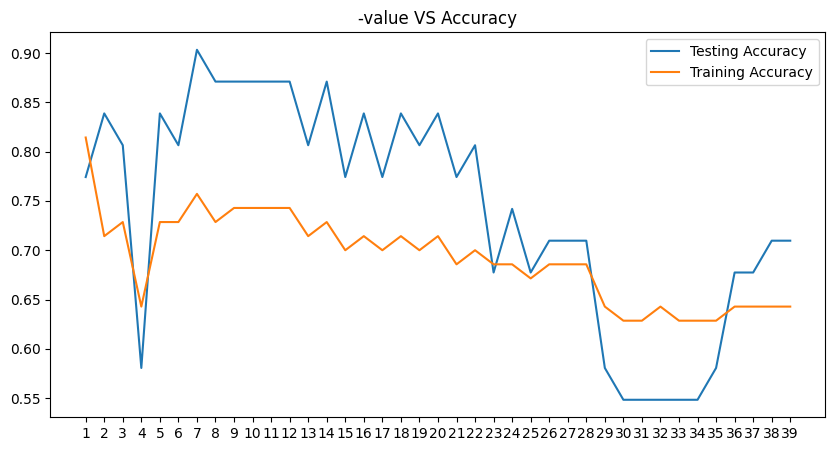

Best accuracy is 0.9032258064516129 with K = 7


In [43]:
k_values = np.arange(1,40)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    train_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))


plt.figure(figsize=[10,5])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))